<a href="https://colab.research.google.com/github/HebaAhmedDahab/Amazon/blob/main/Amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [100]:
df = pd.read_csv("/content/amazon.csv")
df.head(2)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...


## Data Preparation

In [101]:
def missing_values(df):
    return df.isnull().sum()

null_counts = missing_values(df)  # Calculate missing values
df.dropna(inplace=True)       # Drop rows with missing value
updated_null_counts = missing_values(df)   # Verify if missing values have been dropped
print(updated_null_counts)

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


In [102]:
# remove all the signs
df['discounted_price'] = df['discounted_price'].astype(str).str.replace('₹', '').str.replace(',', '').astype(float)

df['actual_price'] = df['actual_price'].astype(str).str.replace('₹', '').str.replace(',', '').astype(float)

df['discount_percentage'] = df['discount_percentage'].astype(str).str.replace('%','').astype(float)/100

In [103]:
df.sample(5)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1089,B09ZTZ9N3Q,Amazon Basics 2000/1000 Watt Room Heater with ...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",1049.0,1699.0,0.38,3.1,111,Say goodbye to the worries about dealing with ...,"AFWHK4LKZHJJVZKD23JDBSMYCTWA,AG4YW4O2PIYELIEF7...","Kulsoom Hussain,Hanamant Waddar,Raju Pandey,Ak...","R3VGVVQLQT97ML,R1Y56E8635Y7QD,RT5YXKE0NNQ8F,R2...","It's good 👍,Good...,Good Product,Satisfied,Goo...","It's working,Good,Good Product 👍,Nice product,...",https://m.media-amazon.com/images/I/31b0Zuxues...,https://www.amazon.in/Amazon-Basics-Adjustable...
328,B08V9C4B1J,Synqe Type C to Type C Short Fast Charging 60W...,Computers&Accessories|Accessories&Peripherals|...,349.0,999.0,0.65,4.3,838,【NOTE before purchase】:This is a USB-C to USB-...,"AFZT774FU3LOJGEW7JSAXOD24OBQ,AGSEMC5UI32EZO6GA...","Uzair Drabu,Ravindra Sistu,Pranav Dhumal,Amres...","RYIE3APCBZO0M,RVVUYDXJQ5FWH,R2OD8G07SP3ATQ,RV4...","Used for 10 months,Quality is good,Good Afters...","Used this cable for 10 months, very sturdy, re...",https://m.media-amazon.com/images/I/31FmMK7a9P...,https://www.amazon.in/Synqe-Braided-Charging-C...
1384,B09XHXXCFH,"AGARO Regal Electric Rice Cooker, 3L Ceramic I...",Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,3685.0,5495.0,0.33,4.1,290,Multi functional use- Steamed veggies and rice...,"AHD7UBRNLFOB46RIRLFXKJY6N53Q,AETPMOGJUEKAM3X4B...","Pratik garg,Amazon Customer,olivia dutta,Ravit...","R1FV12XCLPA07M,RR4FYBIUQQF0S,R3IGJPGKZS06NZ,R3...",It is a great product can be used to make dish...,I used it to make pulao and curry. It is eqsy ...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/AGARO-Regal-Electric-Cer...
226,B08DCVRW98,SoniVision SA-D10 SA-D100 SA-D40 Home Theater ...,"Electronics|HomeTheater,TV&Video|Accessories|R...",209.0,499.0,0.58,4.0,479,Please Match The Image With Your Existing Remo...,"AG4UNVU75Q7SYSAHMQ7XNPAM4Y2A,AES2BOVWXLI3RTOPQ...","ravindra,Thrinath,PD,Prashant,Amazon Customer,...","R2U46UVD4IRLY7,RCZUJPVI3RK1S,R3LXC8533HTPVS,R3...","Better than original sony remote control,Good ...",Superb… am writing this after 2 months usage… ...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/SoniVision-SA-D100-Theat...
1212,B08J7VCT12,KENT 16068 Zoom Vacuum Cleaner for Home and Ca...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",6999.0,14999.0,0.53,4.1,"1,728","Cordless, Hoseless, and Rechargeable vacuum cl...","AFUZ26ZD32I23WLX6MO6UUGYB6VQ,AHEDAEYXIZIPVLI6H...","tamilarasi,shwetha murthy,Srilaxmi challa,Amaz...","R2IC3MR8NSZXMB,R9DLK5R9IBY7H,R3QAFK08KOEM4X,RX...","Good,Nice,Good product 👌,Get's the job done.,K...","Met expectations,Nice,Nice product..since it's...",https://m.media-amazon.com/images/I/31B24fjfiT...,https://www.amazon.in/Kent-Zoom-Vacuum-Cleaner...


In [104]:
# those columns has some error some columns has incorrect characters so will fix this

df['rating'] = df['rating'].astype(str).str.replace(',', '').str.replace('|', '', regex=True).replace('', '0').astype(float)
df['rating_count'] = df['rating_count'].astype(str).str.replace(',', '').str.replace('|', '', regex=True).replace('', '0').astype(float)

In [105]:
df.dtypes

product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage    float64
rating                 float64
rating_count           float64
about_product           object
user_id                 object
user_name               object
review_id               object
review_title            object
review_content          object
img_link                object
product_link            object
dtype: object

In [106]:
df.columns


Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [107]:
len(df)

1463

In [108]:
# splitting the categories to main and sub to undersatnding the classification of the products
df['sub_category'] = df['category'].astype(str).str.split('|').str[-1]
df['main_category'] = df['category'].astype(str).str.split('|').str[0]

## EDA



1.   What are the top-selling categories of products  on Amazon based on the number of sales
2. Which products have the highest and lowest average ratings?
3. Are there any correlations between the discount percentage and the rating of products?
4. Which users have the highest number of reviews and what are their average ratings?
5. Are there any price variations between discounted prices and actual prices for different categories?
6. How do the rating count and the average rating vary across different categories?

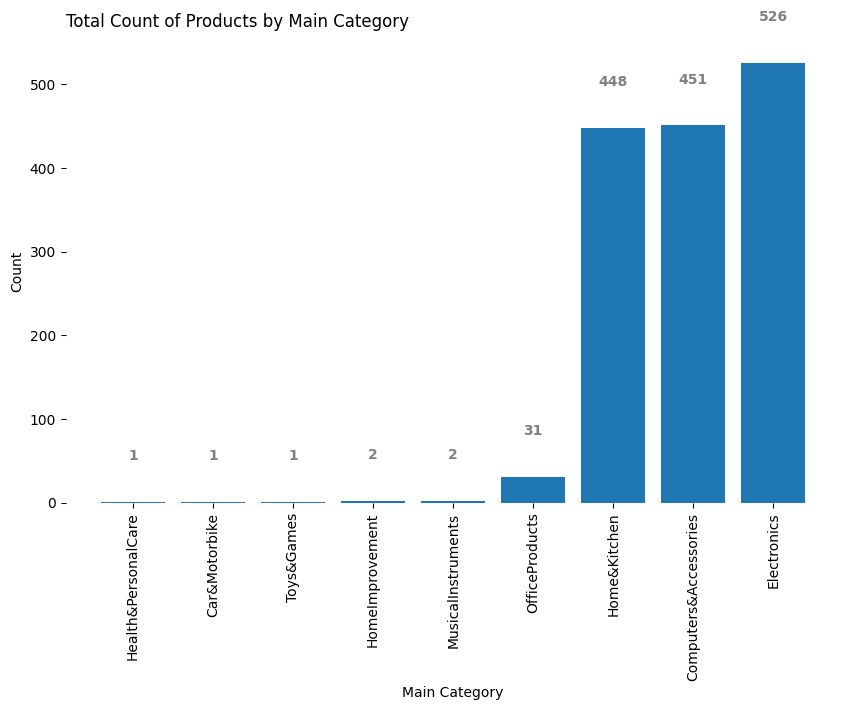

In [109]:
# 1- What are the top-selling categories of products  on Amazon based on the number of sales
counts = df['main_category'].value_counts()

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(counts.index[::-1], counts.values[::-1])

for i in ['top', 'bottom', 'left', 'right']:
    ax.spines[i].set_visible(False)

for i, v in enumerate(counts.values[::-1]):
    ax.text(i, v + 50, str(v), fontweight='bold', color='gray', ha='center')

ax.set_title('Total Count of Products by Main Category', loc='left', pad=10)
ax.set_xlabel('Main Category')
ax.set_ylabel('Count')

plt.xticks(rotation=90)

plt.show()


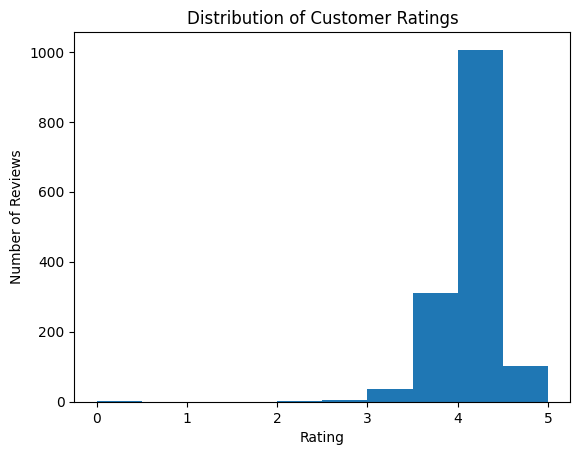

  Cluster  Number of Reviews
3     0-1                  1
4     1-2                  1
2     2-3                  8
1     3-4                525
0     4-5                928


In [110]:
bins = [0, 1, 2, 3, 4, 5] # Define bin edges
df['cluster'] = pd.cut(df['rating'], bins=bins, include_lowest=True, labels=['0-1', '1-2', '2-3', '3-4', '4-5'])
table = df['cluster'].value_counts().reset_index().sort_values('index').rename(columns={'index': 'Cluster', 'cluster': 'Number of Reviews'})

plt.hist(df['rating'])
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Customer Ratings')
plt.show()

print(table)

In [111]:
# 2. Which products have the highest and lowest average ratings?
main_category = df.groupby(['main_category'])['rating'].mean().sort_values(ascending=False).reset_index().round(1)
main_category     # according to the main category

,main_category,rating
0,OfficeProducts,4.3
1,Toys&Games,4.3
2,HomeImprovement,4.2
3,Computers&Accessories,4.2
4,Electronics,4.1
5,Home&Kitchen,4.0
6,Health&PersonalCare,4.0
7,MusicalInstruments,3.9
8,Car&Motorbike,3.8


In [112]:
# according to the sub category
top_sub_category = df.groupby(['sub_category'])['rating'].mean().sort_values(ascending=False).head(10).reset_index().round(1)
lowest_sub_category = df.groupby(['sub_category'])['rating'].mean().sort_values(ascending=False).tail(10).reset_index().round(1)

combined_tables = pd.concat([top_sub_category, lowest_sub_category], axis=1)
display(combined_tables)

,sub_category,rating,sub_category,rating
0,Tablets,4.6,Printers,3.7
1,Film,4.5,Sewing&EmbroideryMachines,3.6
2,Memory,4.5,HalogenHeaters,3.6
3,SmallApplianceParts&Accessories,4.5,PCMicrophones,3.6
4,StreamingClients,4.5,InkjetPrinters,3.6
5,CordManagement,4.5,PCHeadsets,3.5
6,SurgeProtectors,4.5,3DGlasses,3.5
7,PowerLANAdapters,4.5,HandheldVacuums,3.4
8,CoffeePresses,4.5,DustCovers,3.4
9,PaintingMaterials,4.5,ElectricGrinders,3.3


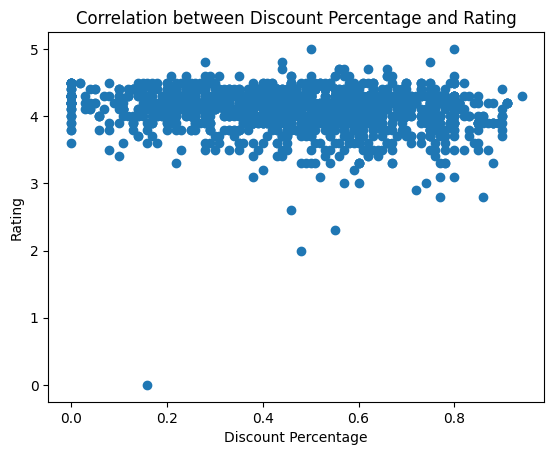

Pearson correlation coefficient: -0.13
Based on the Pearson correlation coefficient, there is a weak negative correlation between the discount percentage and the rating of products in your dataset.


In [113]:
# 3.Are there any correlations between the discount percentage and the rating of products?

def correlation_analysis(correlation):
    if correlation < 0:
        answer = "Based on the Pearson correlation coefficient, there is a weak negative correlation between the discount percentage and the rating of products in your dataset."
    elif correlation > 0:
        answer = "Based on the Pearson correlation coefficient, there is a strong positive correlation between the discount percentage and the rating of products in your dataset."
    else:
        answer = "There is no correlation between the discount percentage and the rating of products in your dataset."

    return answer

plt.scatter(df['discount_percentage'], df['rating'])
plt.xlabel('Discount Percentage')
plt.ylabel('Rating')
plt.title('Correlation between Discount Percentage and Rating')
plt.show()
print(f"Pearson correlation coefficient: {correlation:.2f}")

correlation = df['discount_percentage'].corr(df['rating'])
result = correlation_analysis(correlation)
print(result)

In [114]:
# 4. Which users have the highest number of reviews and what are their average ratings?

user = df.groupby('user_id').agg({'review_id':'count', 'rating':'mean'}).sort_values('review_id', ascending=False)
user.head(10)


,review_id,rating
user_id,,
"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPYWP2OUPEYNPQ,AEBWA5I4QFCA3P3OBEPMELBGN4GQ,AHMGAC6QM62UXNEOCZIHLHSXPP2Q,AFHROSCGIXUPV3FYQ7H5QOD46Q7Q,AEAMIR3CMSA32IDEINSJKHRNANTA,AF355FTXYAKFH5NYPRTE7SL3WO3Q,AG5DWPD54QGSLWJ6QUFERLPNAX4Q",10,4.0
"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBBSNLYT3ONILA,AHCTC6ULH4XB6YHDY6PCH2R772LQ,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,AENGU523SXMOS7JPDTW52PNNVWGQ,AEQJHCVTNINBS4FKTBGQRQTGTE5Q,AFC3FFC5PKFF5PMA52S3VCHOZ5FQ",8,4.2
"AGAELRYPMTG5SADZPDYB343EASAA,AGFN4JODOM2NTFCJQOHDBQLVDJTQ,AG7EZVSAXIVGMNDLSA55K7URQCJA,AGGF75HIEMB67OU7J3RDALBSUKQQ,AHY5CI4SU6JBYPIZ5RLAGO6W3F4A,AE4KODNBVTDCZWZO4HZM4GTRERPA,AH6HFHSYOY2OHMODD7244DHG7FUQ,AHRW5JERWYAJCZO65PDKZSOEPR6Q",8,4.1
"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBXNGXZJT525AQ,AHONIZU3ICIEHQIGQ6R2VFRSBXOQ,AFPHD2CRPDZMWMBL7WXRSVYWS5JA,AEZ346GX3HJ4O4XNRPHCNHXQURMQ,AEPSWFPNECKO34PUC7I56ITGXR6Q,AHWVEHR5DYLVFTO2KF3IZATFQSWQ,AH4QT33M55677I7ISQOAKEQWACYQ",7,4.0
"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5SGCUQBP7YSCA,AH725ST5NW2Y4JZPKUNTIJCUK2BA,AHV3TXIFCJPMS4D5JATCEUR266MQ,AGWIGDEMFIIUAOXYY2QATNBSUGHA,AFSTSLQUV4EVEXWKBOLEFHL2H5YQ,AGAKDNBHY2FKX7I4ACRGILU7QL7A,AFNWJUWJRHCC6HN52KMG5AKZY37Q",7,4.2
"AHWRZWPCTG6ICA7WTNLNNZXWFI5Q,AF2AASVYVSROFD7FXA6EFDS6N2LA,AG6YHIDBTRF4SWXLDWRVMRS56AMQ,AHELRKIGSIPF5VMAGPCPAUJYKOLQ,AH7HRG7P5VGMMU4PN7CEDU74Y2AA,AGPO4HV54G5JLGEZYJJ7NC63V6BQ,AHIMX6EL6H3CLBEVJCWLIQHSAA3A,AEITUHHOUWUNZPQDSHA2ZWQGJUMQ",6,4.1
"AG44HJB2AMIVHAGQZ2WGWONERKCA,AHL2FABQV6XAHZN547DN662X5RWA,AHJE6QFY5XEOZJJWOIOHHIDFWWFQ,AEDMSJ2CEQZID62NXPKEQLMBG2LQ,AHF7ZBKNBLCLFHGJG5KXKPI7QVCQ,AGD2S7EXXSXHBCJHTXUAV6FLXAZA,AHZRUY7MR4SVM3HFJ2SZDGHZJ56A,AHEHKOZPPOVYL75KDU52PSBYDEFQ",6,4.4
"AF477BP57JM7Z4JD4PYB2K33R6AQ,AGTDD34Y77OB36JNYQWQDN7MHECQ,AG7POKBSWQUO4VOYD4HDWYKMMJ4Q,AFZS6H2ZFJEJHRWIJ3IYL7V6KRPA,AHCYM2ECKI2MNOIDHDG4PT6IIN6A,AECZ4IP3TBM4EUG52BZAOQV3EKIA,AH6RQDXZYKAUPNBOYC4NAZERTFOQ,AFTVETL4HGH4KRUF4NXGJUEDPBAQ",5,3.9
"AHEVOQADJSSRX7DS325HSFLMP7VQ,AG7XYZRCSKX6G2OLO7DVZWIZ3PUQ,AE2THTCCQLBIUSWPF4CPXC6GGP7Q,AHUJZOV34DFEN55QQ5XOYKVKHV6Q,AELX4DI77ZHURZTDLYFU7XMP7R6Q,AE2ODWBBOBD2SITDDIEJ644OSRFQ,AFLW4WXYQ3G6HU5LBQORDDZO3FOQ,AGGRC2P6M43GDEWCAHGYAILCSKTQ",5,4.2


In [115]:
# 5. Are there any price variations between discounted prices and actual prices for different categories?

price_variations = df.groupby('main_category').agg(avg_discounted_price=('discounted_price', 'mean'),
                                              avg_actual_price=('actual_price', 'mean'), mean_rating=('rating','mean')).round(1)

price_variations['price_variation'] = price_variations['avg_discounted_price'] - price_variations['avg_actual_price']
sorted_variations = price_variations.sort_values('price_variation', ascending=False)
sorted_variations[['price_variation', 'mean_rating']]


,price_variation,mean_rating
main_category,,
Toys&Games,0.0,4.3
OfficeProducts,-95.6,4.3
HomeImprovement,-462.0,4.2
MusicalInstruments,-709.0,3.9
Computers&Accessories,-841.3,4.2
Health&PersonalCare,-1001.0,4.0
Car&Motorbike,-1661.0,3.8
Home&Kitchen,-1831.5,4.0
Electronics,-4161.4,4.1


In [116]:
# 6.How do the rating count and the average rating vary across different categories?

rating = df.groupby('main_category').agg(rating_count=('rating_count', 'count'), average_rating=('rating', 'mean')).round(1)
rating

,rating_count,average_rating
main_category,,
Car&Motorbike,1,3.8
Computers&Accessories,451,4.2
Electronics,526,4.1
Health&PersonalCare,1,4.0
Home&Kitchen,448,4.0
HomeImprovement,2,4.2
MusicalInstruments,2,3.9
OfficeProducts,31,4.3
Toys&Games,1,4.3
